In [1]:
# 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'

# 패키지 로드
import pandas as pd
import numpy as np
import seaborn as sns

# 퀴즈 정답
---

### 73쪽 혼자서 해보기

#### Q1

In [2]:
score = [80, 60, 70, 50, 90]  # 변수 만들기
score                         # 출력하기

[80, 60, 70, 50, 90]

#### Q2

In [3]:
sum(score)                    # score의 합계 구하기

350

#### Q3

In [4]:
sum_score = sum(score)        # score의 합계를 담은 변수 만들기
sum_score                     # sum_score 출력하기

350

### 84쪽 혼자서 해보기

#### Q1

In [5]:
# 데이터 프레임 만들기
sales = pd.DataFrame({'fruit'  : ['사과', '딸기', '수박'],
                      'price'  : [1800, 1500, 3000],
                      'volume' : [24, 38, 13]})

# 데이터 프레임 출력하기
sales

,fruit,price,volume
0,사과,1800,24
1,딸기,1500,38
2,수박,3000,13


#### Q2

In [6]:
sum(sales['price']) / 3   # 가격 평균 구하기

2100.0

<br>

In [7]:
sum(sales['volume']) / 3  # 판매량 평균 구하기

25.0

### 115쪽 혼자서 해보기

#### Q1

In [8]:
mpg = pd.read_csv('mpg.csv')  # mpg 데이터 불러오기
mpg_new = mpg.copy()          # 복사본 만들기

#### Q2

In [9]:
mpg_new = mpg_new.rename(columns = {'cty' : 'city'})     # cty를 city로 수정
mpg_new = mpg_new.rename(columns = {'hwy' : 'highway'})  # hwy를 highway로 수정

#### Q3

In [10]:
mpg_new.head()  # 데이터 일부 출력

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### 130쪽 분석 도전

#### 문제 1

In [11]:
midwest = pd.read_csv('midwest.csv')  # midwest 데이터 불러오기
# midwest.head()                        # 앞부분 출력
# midwest.tail()                        # 뒷부분 출력
# midwest.shape                         # 행, 열 개수 출력
# midwest.info()                        # 변수 속성 출력
# midwest.describe()                    # 요약 통계량 출력

> (편집) 결과 생략 표시

#### 문제 2

In [12]:
# poptotal을 total로 수정
midwest = midwest.rename(columns = {'poptotal' : 'total'})  

# popasian을 asian으로 수정
midwest = midwest.rename(columns = {'popasian' : 'asian'})

#### 문제 3

<Axes: ylabel='Frequency'>

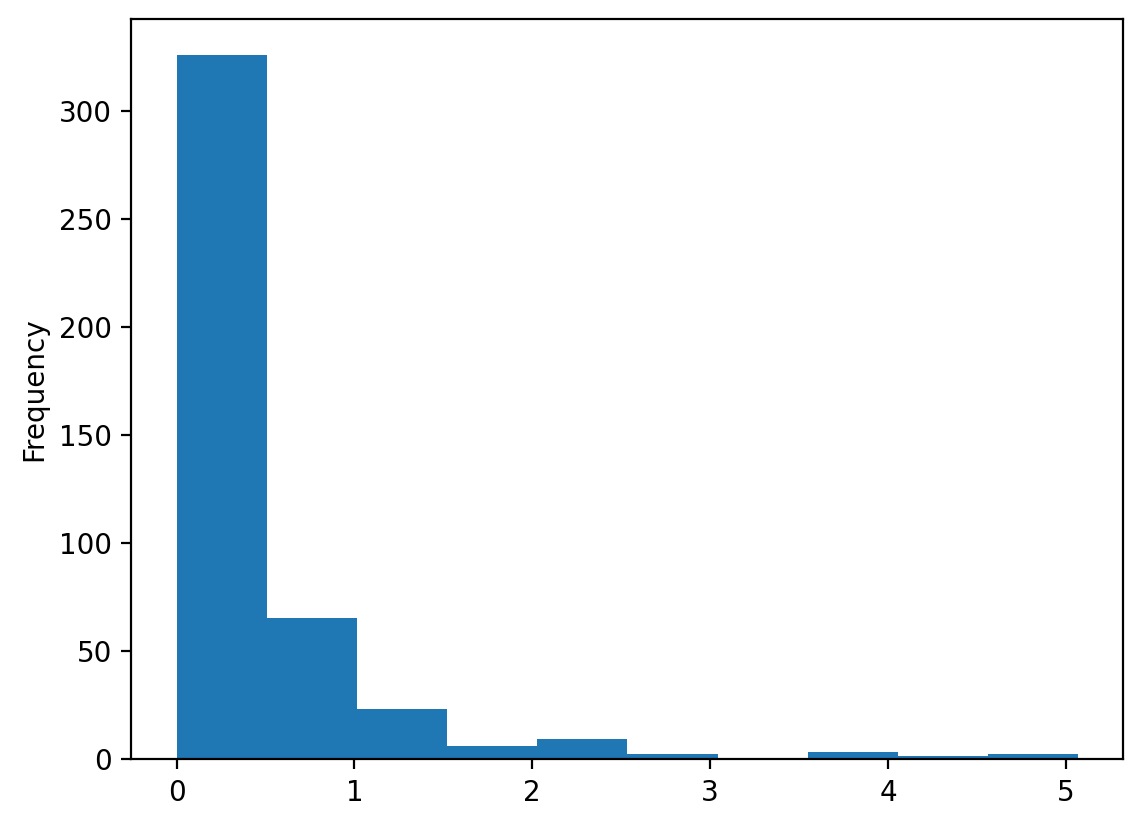

In [13]:
# 백분율 변수 추가
midwest['ratio'] = midwest['asian']/midwest['total'] * 100  

# 히스토그램 만들기
midwest['ratio'].plot.hist()                                

#### 문제 4

In [14]:
# ratio 평균
midwest['ratio'].mean()

0.4872461834357345

In [15]:
# large, small 부여
midwest['group'] = np.where(midwest['ratio'] > 0.4872, 'large', 'small')

#### 문제 5

In [16]:
# group 빈도 구하기
count_group = midwest['group'].value_counts()  
count_group

group
small    318
large    119
Name: count, dtype: int64

<Axes: xlabel='group'>

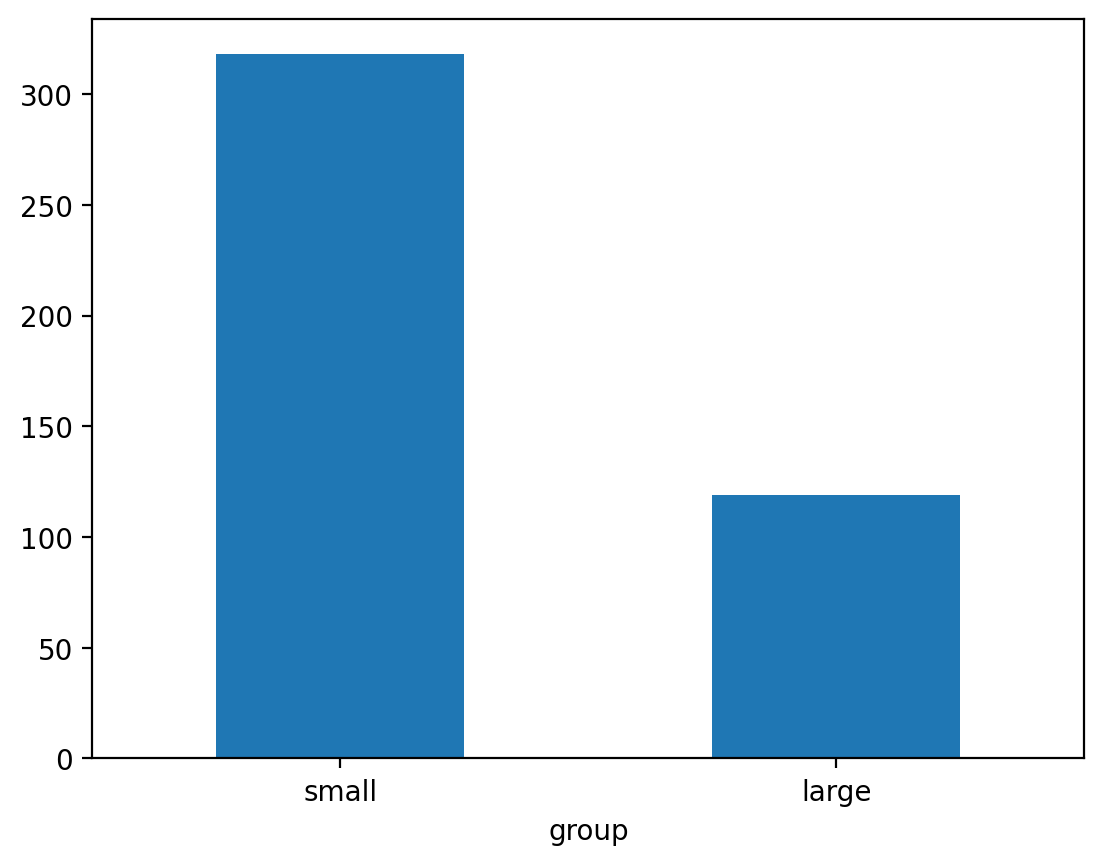

In [17]:
# 막대 그래프 만들기
count_group.plot.bar(rot = 0)                  

### 144쪽 혼자서 해보기

#### Q1

In [18]:
mpg = pd.read_csv('mpg.csv')     # mpg 데이터 불러오기
mpg_a = mpg.query('displ <= 4')  # displ 4 이하 추출
mpg_b = mpg.query('displ >= 5')  # displ 5 이상 추출

In [19]:
mpg_a['hwy'].mean()  # displ 4 이하의 hwy 평균

25.96319018404908

In [20]:
mpg_b['hwy'].mean()  # displ 5 이상의 hwy 평균

18.07894736842105

#### Q2

In [21]:
mpg_audi   = mpg.query('manufacturer == "audi"')    # audi 추출
mpg_toyota = mpg.query('manufacturer == "toyota"')  # toyota 추출

In [22]:
mpg_audi['cty'].mean()    # audi의 cty 평균

17.61111111111111

In [23]:
mpg_toyota['cty'].mean()  # toyota의 cty 평균

18.529411764705884

#### Q3

In [24]:
# manufacturer가 chevrolet, ford, honda에 해당하면 추출
mpg_new = mpg.query('manufacturer in ["chevrolet", "ford", "honda"]')
mpg_new['hwy'].mean()

22.50943396226415

### 150쪽 혼자서 해보기

#### Q1

In [25]:
mpg = pd.read_csv('mpg.csv')        # mpg 데이터 불러오기
mpg_new = mpg[['category', 'cty']]  # category, cty 추출
mpg_new.head()                      # mpg_new 일부 출력

,category,cty
0,compact,18
1,compact,21
2,compact,20
3,compact,21
4,compact,16


#### Q2

In [26]:
mpg_new.query('category == "suv"')['cty'].mean()  # suv의 cty 평균

13.5

In [27]:
mpg_new.query('category == "compact"')['cty'].mean()  # compact의 cty 평균

20.127659574468087

### 153쪽 혼자서 해보기

#### Q1

In [28]:
# mpg 데이터 불러오기
# audi 추출
# hwy 내림차순 정렬
# 5행까지 출력
mpg = pd.read_csv('mpg.csv')     
mpg.query('manufacturer == "audi"') \
   .sort_values('hwy', ascending = False) \
   .head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


### 158쪽 혼자서 해보기

#### Q1

In [29]:
mpg = pd.read_csv('mpg.csv')  # mpg 데이터 불러오기
mpg_new = mpg.copy()          # mpg 복사본 만들기

# 합산 연비 변수 추가
mpg_new = mpg_new.assign(total = mpg_new['cty'] + mpg_new['hwy'])  

#### Q2

In [30]:
# 평균 연비 변수 추가
mpg_new = mpg_new.assign(mean = mpg_new['total'] / 2)  

#### Q3

In [31]:
# mean 기준 내림차순 정렬, 상위 3행 출력
mpg_new.sort_values('mean', ascending = False).head(3)  

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mean
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


> (편집) 맨 오른쪽 total, mean 컬럼 보이도록 중간 열 생략

#### Q4

In [32]:
# 합산 연비 변수 추가
# 평균 연비 변수 추가
# 내림차순 정렬
# 상위 3행 출력
mpg.assign(total = lambda x: x['cty'] + x['hwy'],
           mean  = lambda x: x['total'] / 2) \
   .sort_values('mean', ascending = False) \
   .head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mean
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


### 166쪽 혼자서 해보기

#### Q1

In [33]:
# mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

In [34]:
# category별 분리
# cty 평균 구하기
mpg.groupby('category') \
   .agg(mean_cty = ('cty', 'mean'))

,mean_cty
category,
2seater,15.400000
compact,20.127660
midsize,18.756098
minivan,15.818182
pickup,13.000000
subcompact,20.371429
suv,13.500000


#### Q2

In [35]:
# category별 분리
# cty 평균 구하기
# 내림차순 정렬
mpg.groupby('category') \
   .agg(mean_cty = ('cty', 'mean')) \
   .sort_values('mean_cty', ascending = False)

,mean_cty
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098
minivan,15.818182
2seater,15.400000
suv,13.500000
pickup,13.000000


#### Q3

In [36]:
# manufacturer별 분리
# hwp 평균 구하기
# 내림차순 정렬
# 상위 3행 출력
mpg.groupby('manufacturer') \
   .agg(mean_hwy = ('hwy', 'mean')) \
   .sort_values('mean_hwy', ascending = False) \
   .head(3)

,mean_hwy
manufacturer,
honda,32.555556
volkswagen,29.222222
hyundai,26.857143


#### Q4

In [37]:
## 방법1

# compact 추출
# manufacturer별 분리
# 빈도 구하기
# 내림차순 정렬
mpg.query('category == "compact"') \
   .groupby('manufacturer') \
   .agg(n = ('manufacturer', 'count')) \
   .sort_values('n', ascending = False)

,n
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


In [38]:
## 방법2

# compact 추출
# manufacturer별 빈도 구하기
mpg.query('category == "compact"') \
   .value_counts('manufacturer')

manufacturer
audi          15
volkswagen    14
toyota        12
subaru         4
nissan         2
Name: count, dtype: int64

### 173쪽 혼자서 해보기 

In [39]:
fuel = pd.DataFrame({'fl'       : ['c', 'd', 'e', 'p', 'r'],
                     'price_fl' : [2.35, 2.38, 2.11, 2.76, 2.22]})

#### Q1

In [40]:
# mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

# mpg에 연료 가격 변수 추가
mpg = pd.merge(mpg, fuel, how = 'left', on = 'fl')

#### Q2

In [41]:
# 변수 추출, 앞부분 일부 출력
mpg[['model', 'fl', 'price_fl']].head()             

,model,fl,price_fl
0,a4,p,2.76
1,a4,p,2.76
2,a4,p,2.76
3,a4,p,2.76
4,a4,p,2.76


### 176쪽 분석 도전

#### 문제 1

In [42]:
# midwest 데이터 불러오기
midwest = pd.read_csv('midwest.csv')

In [43]:
# midwest에 백분율 변수 추가
midwest['ratio'] = (midwest['poptotal'] - midwest['popadults']) \
                  / midwest['poptotal'] * 100

#### 문제 2

In [44]:
# ratio 내림차순 정렬
# 상위 5행 추출
# 변수 추출
midwest.sort_values('ratio', ascending = False) \
       .head() \
       [['county', 'ratio']]

,county,ratio
230,ISABELLA,51.501172
404,MENOMINEE,50.591260
281,ATHENS,49.320727
247,MECOSTA,49.059183
154,MONROE,47.358182


#### 문제 3

In [45]:
# midwest에 grade 변수 추가
midwest['grade'] = np.where(midwest['ratio'] >= 40, 'large',
                   np.where(midwest['ratio'] >= 30, 'middle', 'small'))

In [46]:
## 방법1

# grade별 분리
# grade 빈도 구하기
midwest.groupby('grade') \
       .agg(n = ('grade', 'count'))

,n
grade,
large,32
middle,396
small,9


In [47]:
## 방법2
midwest['grade'].value_counts()

grade
middle    396
large      32
small       9
Name: count, dtype: int64

#### 문제 4

In [48]:
# 백분율 변수 추가
# 내림차순 정렬
# 상위 10행 출력
# 변수 추출
midwest.assign(ratio_asian = midwest['popasian'] / midwest['poptotal'] * 100) \
       .sort_values('ratio_asian') \
       .head(10) \
       [['state', 'county', 'ratio_asian']]

,state,county,ratio_asian
404,WI,MENOMINEE,0.000000
105,IN,BENTON,0.010592
109,IN,CARROLL,0.015950
358,OH,VINTON,0.027032
390,WI,IRON,0.032504
85,IL,SCOTT,0.053154
112,IN,CLAY,0.060716
261,MI,OSCODA,0.063759
340,OH,PERRY,0.066546
73,IL,PIATT,0.070749


### 185쪽 혼자서 해보기

In [49]:
mpg = pd.read_csv('mpg.csv')                       # mpg 데이터 불러오기
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan  # NaN 할당하기

#### Q1

In [50]:
# 결측치 빈도 확인
mpg[['drv', 'hwy']].isna().sum()  

drv    0
hwy    5
dtype: int64

#### Q2

In [51]:
# hwy 결측치 제거
# drv별 분리
# hwy 평균 구하기
mpg.dropna(subset = 'hwy') \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


### 194쪽 혼자서 해보기

In [52]:
mpg = pd.read_csv('mpg.csv')                         # mpg 데이터 불러오기
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'                # drv 이상치 할당
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]  # cty 이상치 할당

#### Q1

In [53]:
# 이상치 확인
mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
k      4
r     24
Name: count, dtype: int64

In [54]:
# drv가 4, f, r이면 기존 값 유지, 그 외 NaN 부여
mpg['drv'] = np.where(mpg['drv'].isin(['4', 'f', 'r']), mpg['drv'], np.nan)

In [55]:
# 이상치 확인
mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
r     24
Name: count, dtype: int64

#### Q2

<Axes: ylabel='cty'>

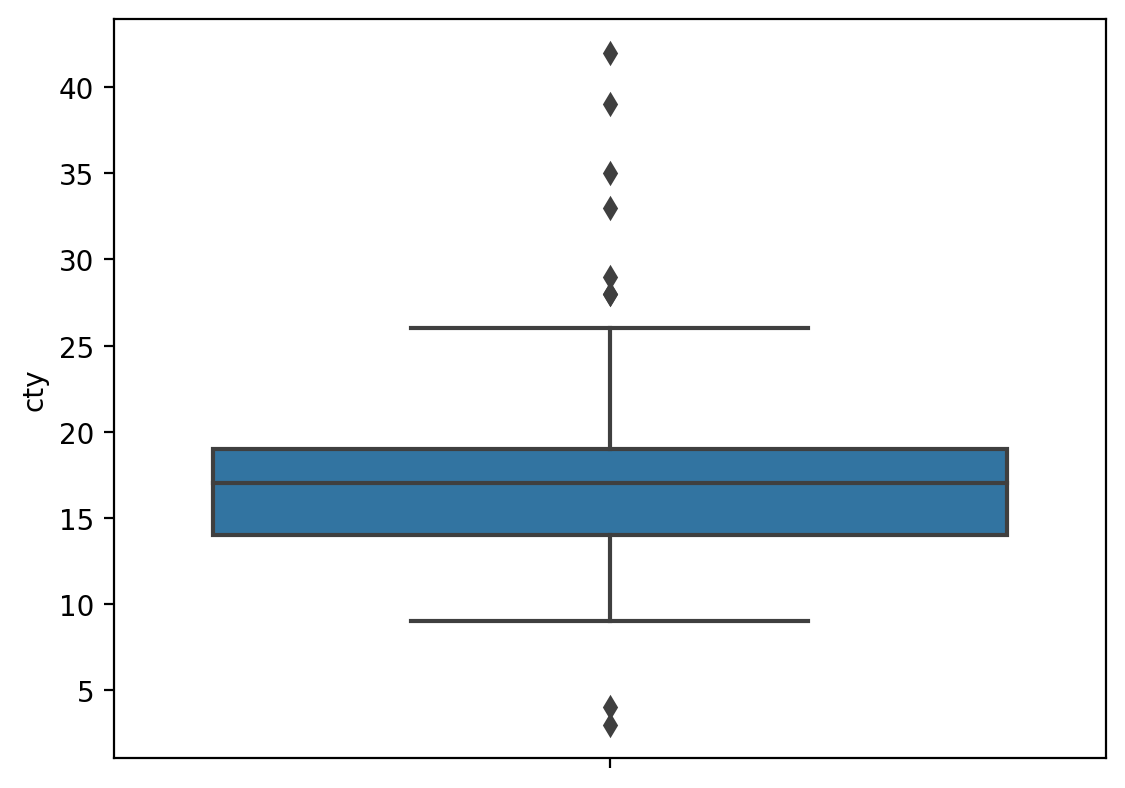

In [56]:
# 상자 그림 만들기
sns.boxplot(data = mpg, y = 'cty')

In [57]:
pct25 = mpg['cty'].quantile(.25)  # 1사분위수
pct75 = mpg['cty'].quantile(.75)  # 3사분위수
iqr = pct75 - pct25               # IQR

In [58]:
pct25 - 1.5 * iqr  # 하한

6.5

In [59]:
pct75 + 1.5 * iqr  # 상한

26.5

In [60]:
# 6.5 ~ 26.5 벗어나면 NaN 부여
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5), np.nan, mpg['cty'])

<Axes: ylabel='cty'>

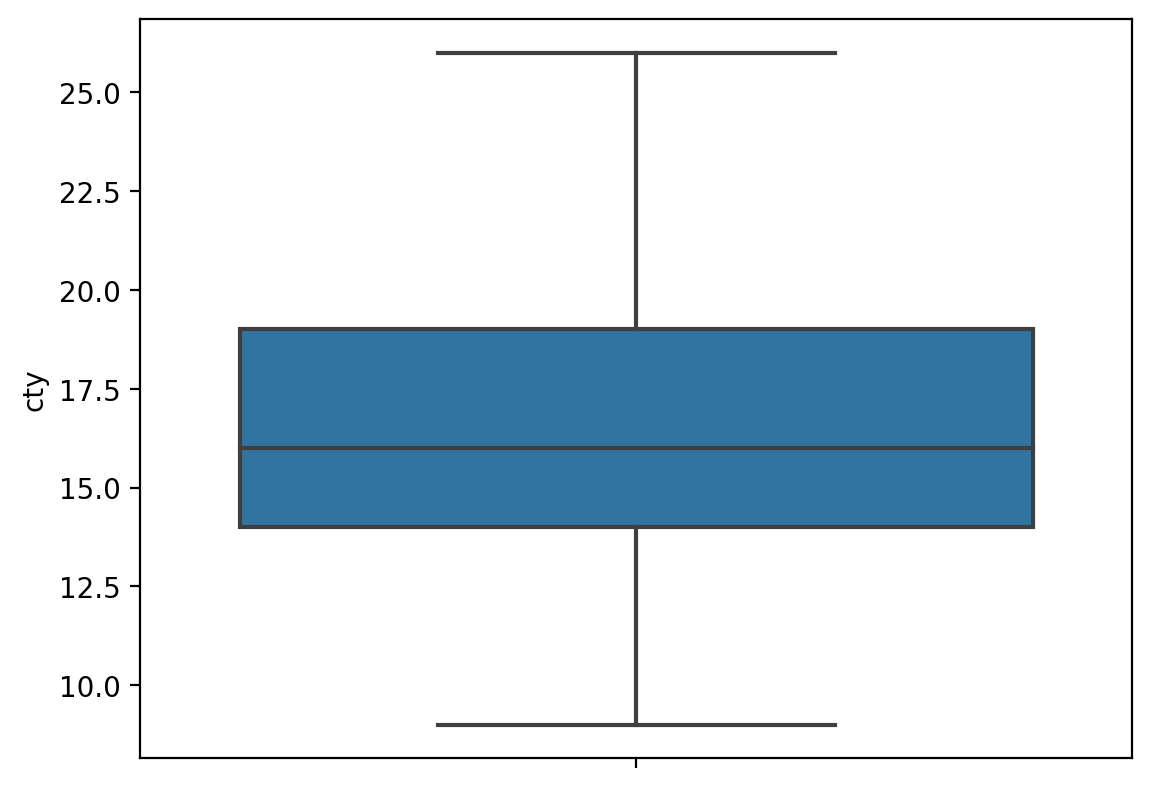

In [61]:
# 상자 그림 만들기
sns.boxplot(data = mpg, y = 'cty')

#### Q3

In [62]:
# drv, cty 결측치 제거
# drv별 분리
# cty 평균 구하기
mpg.dropna(subset = ['drv', 'cty']) \
   .groupby('drv') \
   .agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333


### 204쪽 혼자서 해보기

#### Q1

<Axes: xlabel='cty', ylabel='hwy'>

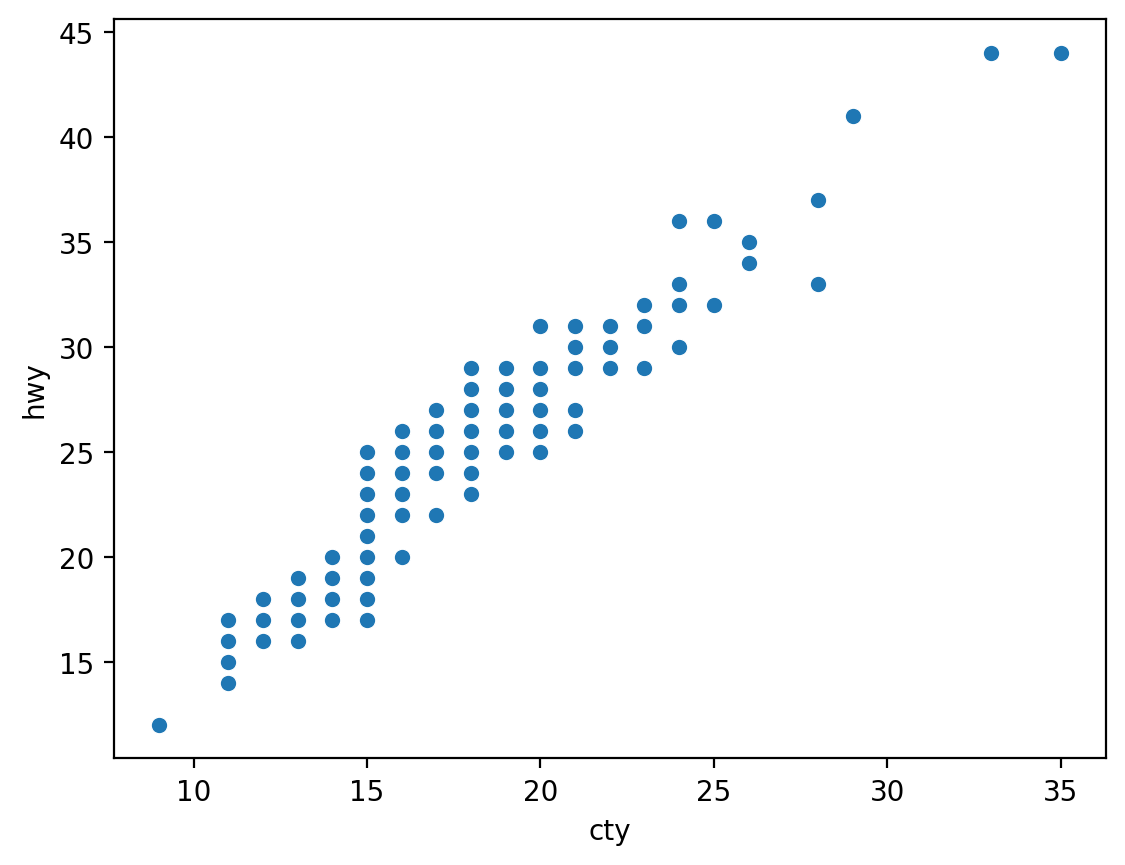

In [63]:
mpg = pd.read_csv('mpg.csv')                       # mpg 데이터 불러오기
sns.scatterplot(data = mpg, x = 'cty', y = 'hwy')  # 산점도 만들기

#### Q2

[(0.0, 500000.0), (0.0, 10000.0)]

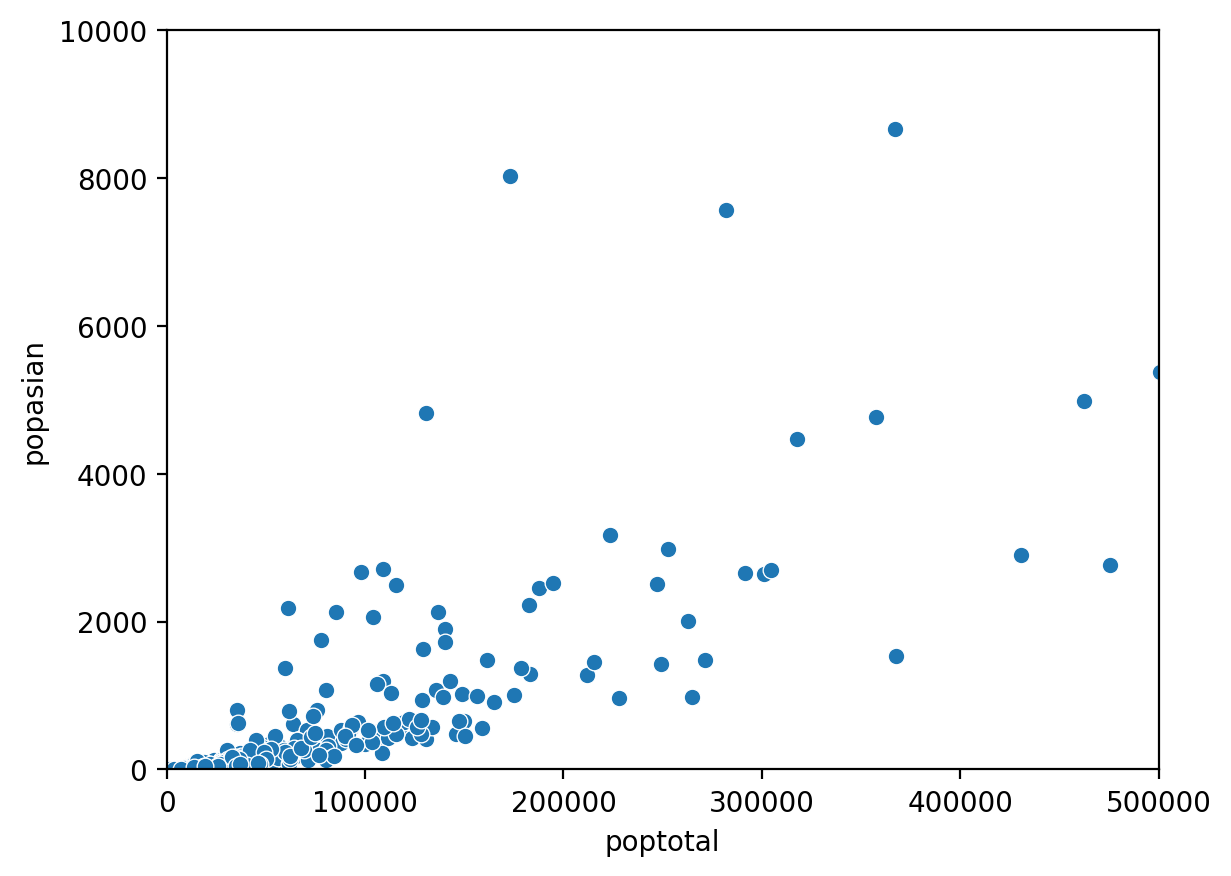

In [64]:
# midwest 데이터 불러오기
midwest = pd.read_csv('midwest.csv')

# 산점도 만들기, 축 범위 제한하기
sns.scatterplot(data = midwest, x = 'poptotal', y = 'popasian') \
   .set(xlim = (0, 500000), ylim = (0, 10000))

### 211쪽 혼자서 해보기

#### Q1

In [65]:
# mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

In [66]:
# suv 차종 추출
# manufacturer별 분리
# cty 평균 구하기
# 내림차순 정렬
# 상위 5행 추출
df = mpg.query('category == "suv"') \
        .groupby('manufacturer', as_index = False) \
        .agg(mean_cty = ('cty','mean')) \
        .sort_values('mean_cty', ascending = False) \
        .head()
df

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


<Axes: xlabel='manufacturer', ylabel='mean_cty'>

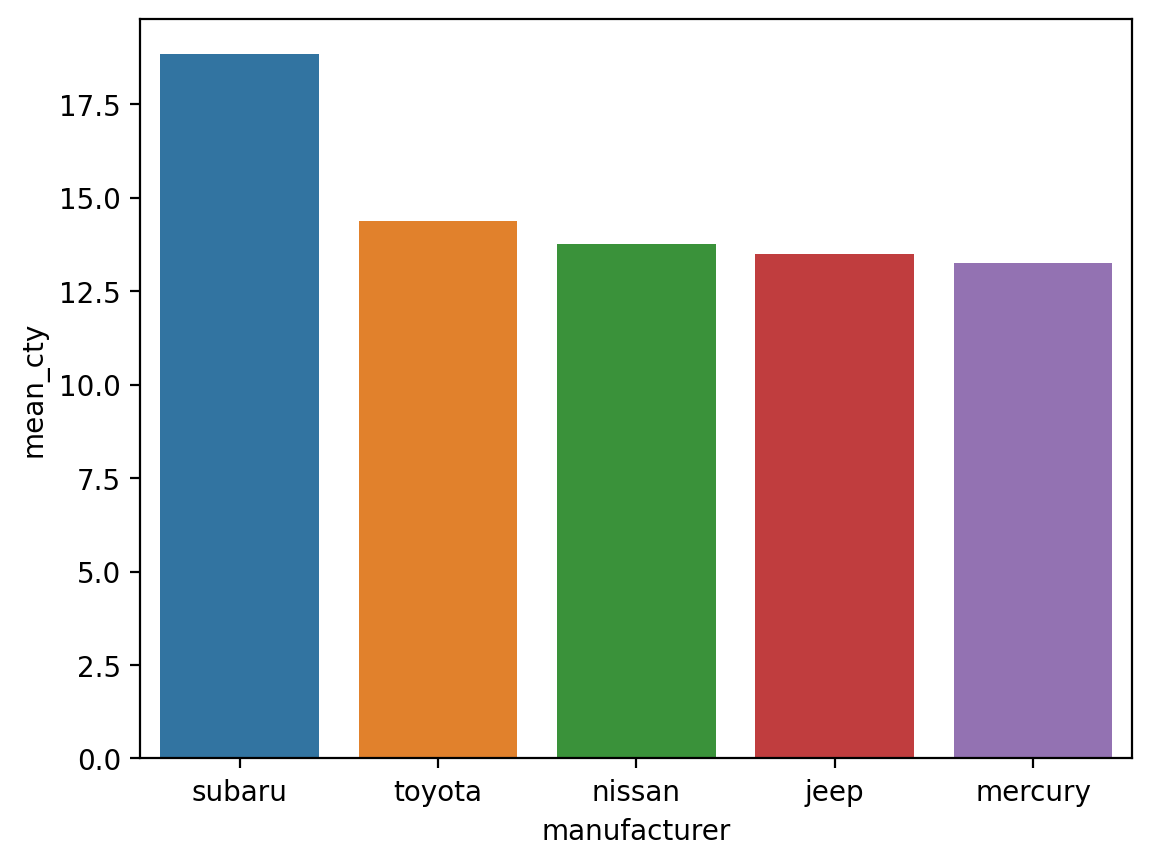

In [67]:
# 막대 그래프 만들기
sns.barplot(data = df, x = 'manufacturer', y = 'mean_cty')


#### Q2

In [68]:
# category별 분리
# 빈도 구하기
# 내림차순 정렬
df_mpg = mpg.groupby('category', as_index = False) \
            .agg(n = ('category', 'count')) \
            .sort_values('n', ascending = False)

df_mpg

,category,n
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


<Axes: xlabel='category', ylabel='n'>

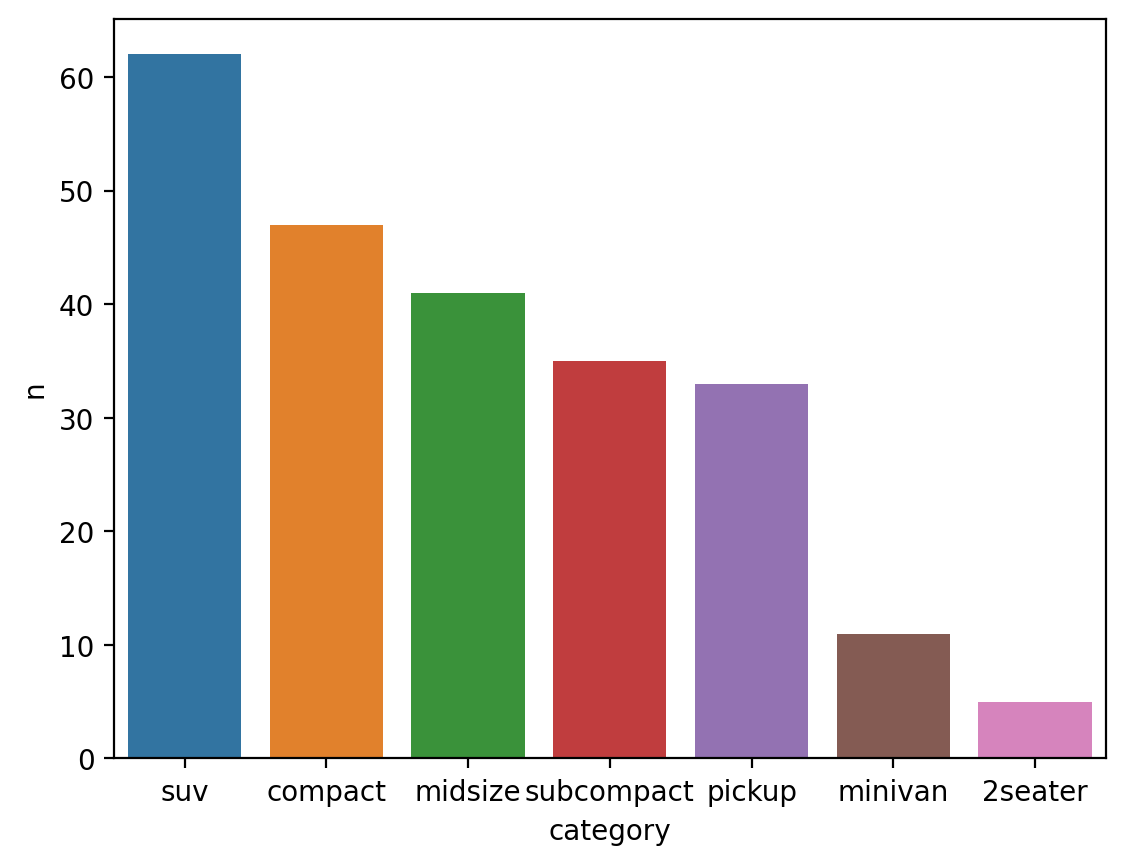

In [69]:
# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'category', y = 'n')


### 217쪽 혼자서 해보기

#### Q1

<Axes: xlabel='year', ylabel='psavert'>

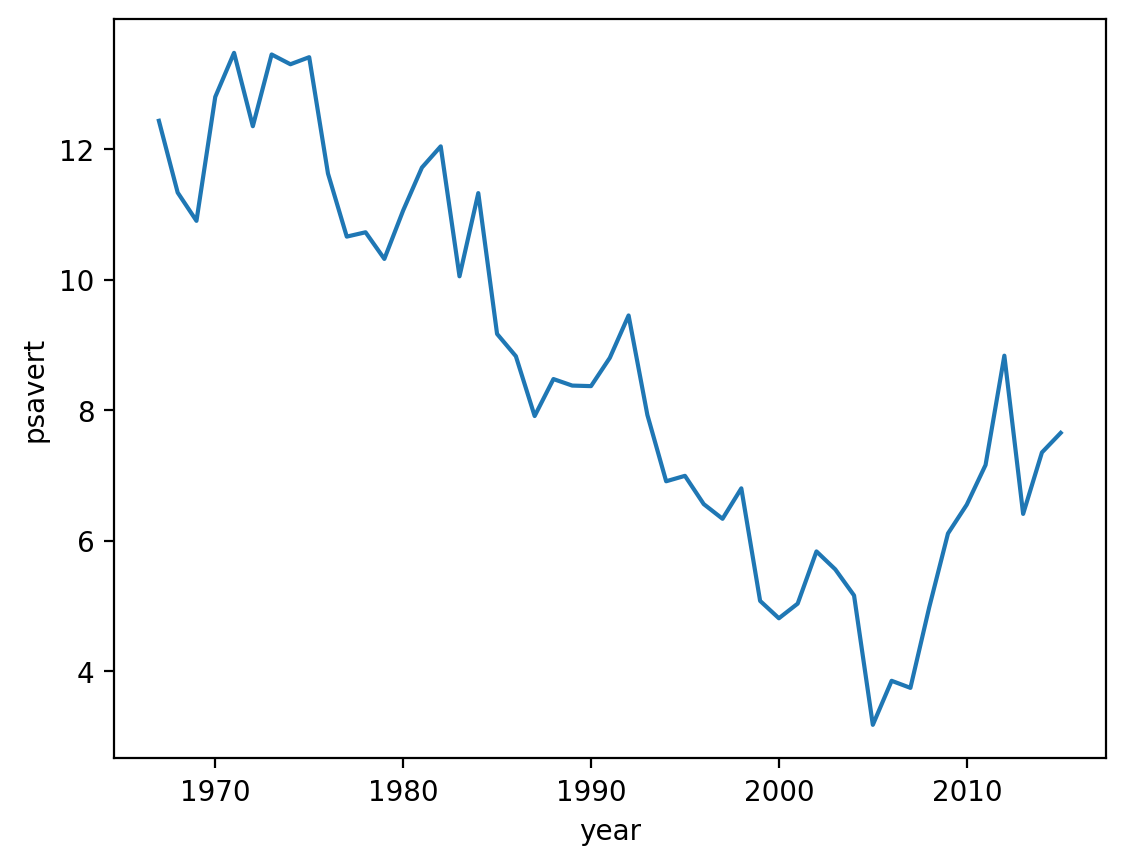

In [70]:
# economics 데이터 불러오기
economics = pd.read_csv('economics.csv')

# 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])

# 연도 변수 추가
economics['year'] = economics['date2'].dt.year

# 연도별 개인 저축률 선 그래프
sns.lineplot(data = economics, x = 'year', y = 'psavert', errorbar = None)

#### Q2

<Axes: xlabel='month', ylabel='psavert'>

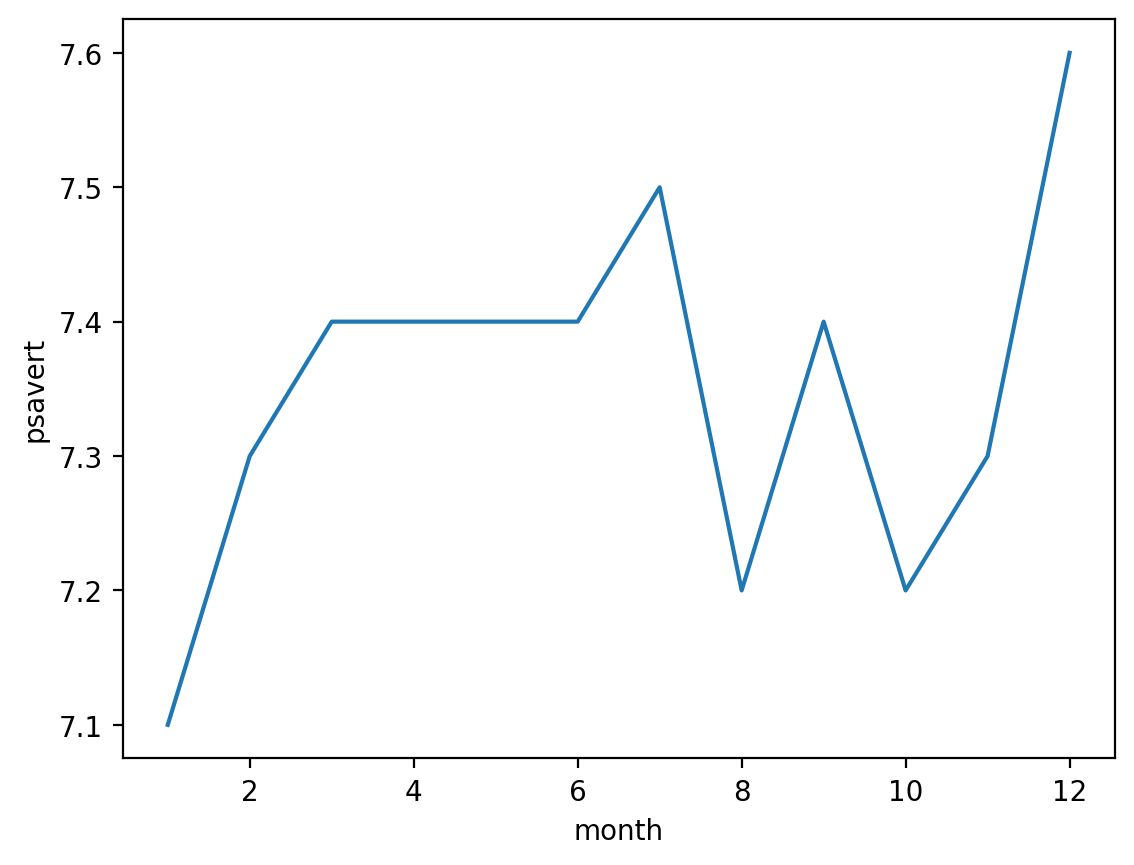

In [71]:
# 월 변수 추가
economics['month'] = economics['date2'].dt.month                     

# 2014년 추출
df_2014 = economics.query('year == 2014')                           

# 선 그래프 만들기
sns.lineplot(data = df_2014, x = 'month', y = 'psavert', errorbar = None) 

### 220쪽 혼자서 해보기

#### Q1

<Axes: xlabel='category', ylabel='cty'>

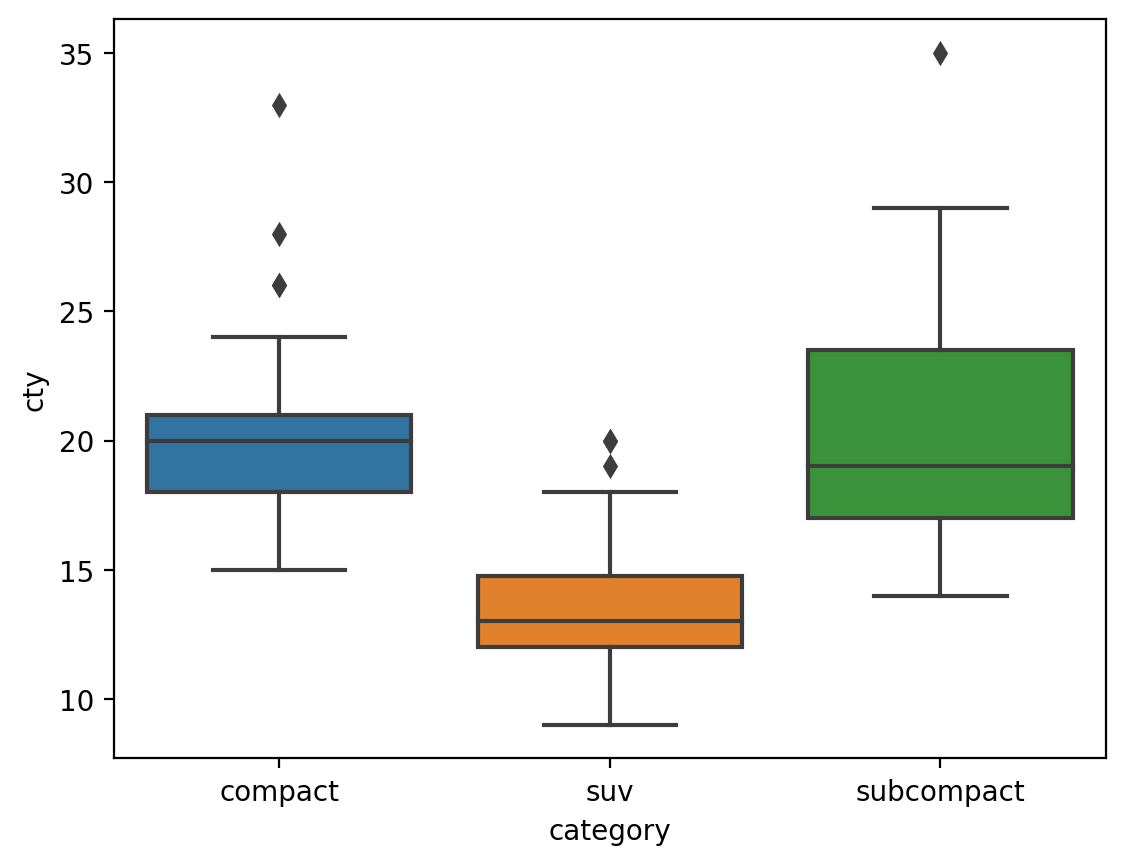

In [72]:
# mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

# compact, subcompact, suv 차종 추출
df = mpg.query('category in ["compact", "subcompact", "suv"]')

# 상자 그림 만들기
sns.boxplot(data = df, x = 'category', y = 'cty')